# Lab  #2

First and Last Name: Hanzala Akram

Student ID: 500899943

Video URL: N/A - Demo done in class

How much is the percentage of each class 0 and 1?
Percentage of zeros is: 65.36796536796537
Percentage of ones is: 34.63203463203463


Correlation Matrix for Dataset:


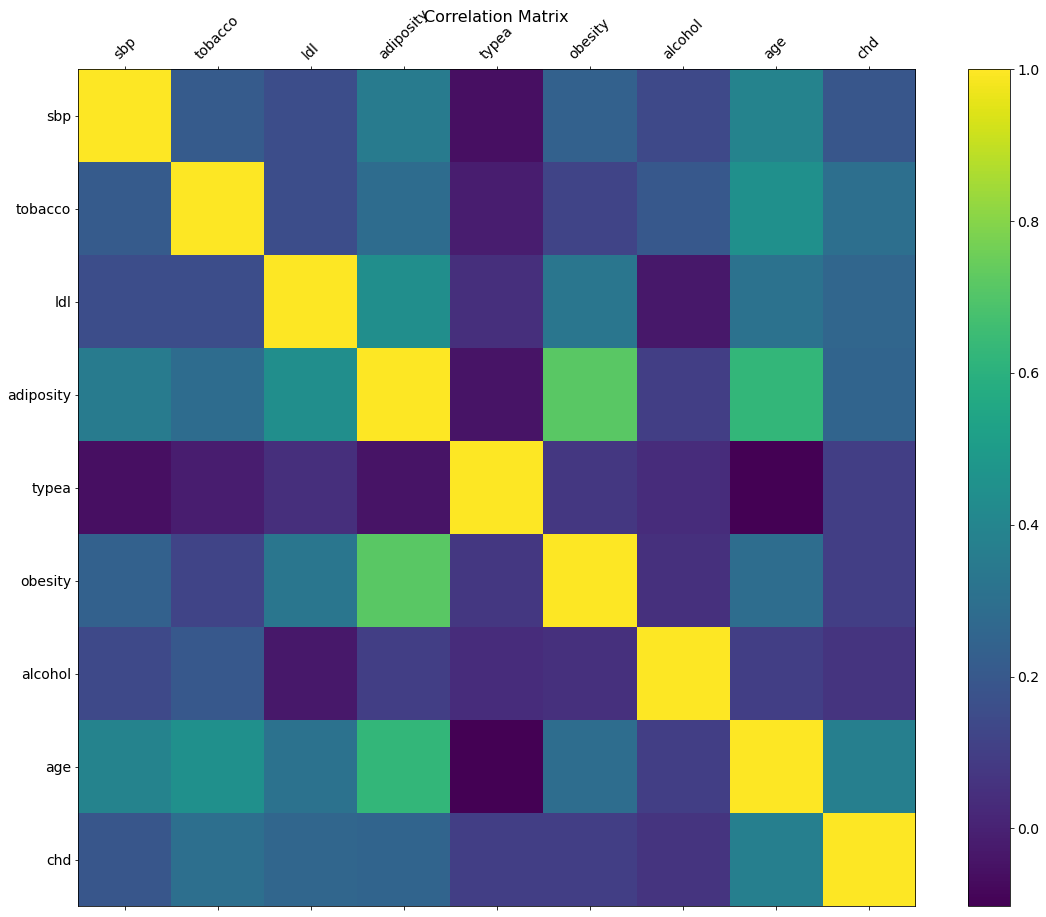



The accuracy of the model is:  0.7586206896551724


In [5]:
import matplotlib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Functions #
# Standardize function, find mean and standard deviation and outputs standardized value
def standardizeFunc(input):
  inputMean = np.mean(input)
  inputStd = np.std(input)
  standardInput = (input - inputMean)/inputStd
  return standardInput

# Initialize theta array with a random theta value between 0 and 1
def initializeTheta(amountOfValues):
  theta = []
  for i in range(amountOfValues):
    randomTheta = random.random()
    theta.append(randomTheta)
  return theta

# Hypothesis model (defining the sigmoid function)
def sigmoidFunc(X, theta):
  h = 0
  z = theta[0]
  for i in range(9):
    z = z + theta[i+1]*X.iloc[:,i]
  h = 1/(1+np.exp(-z))
  return h 

# Cost/Error function
def costFunc(Y, h):
  cost = 0
  sum = 0
  m = len(Y)
  for i in range(m):
    sum = sum + ((Y.iloc[i] * np.log(h.iloc[i])) + ((1 - Y.iloc[i]) * np.log(1 - h.iloc[i])))
  cost = (-1/m)*sum
  return cost

# Batch gradient desacent function
def batchGradientDescentFunc(theta, alpha, X, Y, h):
  thetaNew = theta.copy()  
  m = len(h)  
  n = len(X.columns)  
  for j in range(n):
    sum = 0
    for i in range(m):
      sum = sum + ((Y.iloc[i] - h.iloc[i]) * X.iloc[i,j])
    thetaNew[j] = theta[j] + alpha * ((1/m)*sum)
  return thetaNew

# Mini batch gradient desacent function
def miniBatchGradientDescentFunc(theta, alpha, X, Y, h, startIndex, endIndex):
  thetaNew = theta.copy()  
  m = len(h)  
  n = len(X.columns)  
  for j in range(n):
    sum = 0
    for i in range(startIndex, endIndex):
      sum = sum + ((Y.iloc[i] - h.iloc[i]) * X.iloc[i,j])
    thetaNew[j] = theta[j] + alpha * ((1/m)*sum)
  return thetaNew

# Get the indexes for batch gradient descent
def getBatchIndex(startIndex, endIndex, batchSize, totalLen):
  if startIndex == 0:
    startIndex = startIndex + batchSize - 1
  else:
    startIndex = startIndex + batchSize
  if endIndex + batchSize < totalLen:
    endIndex = endIndex + batchSize
  else:
    endIndex = endIndex + (totalLen - endIndex)
  return startIndex, endIndex

# Cost graphing function
def plotCost(xPoints,yPoints,title,xLabel,yLabel):
  plt.plot(xPoints,yPoints)
  plt.title(title)
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)

# Initializing datasets and values #
# Data sets to be used 
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")  
# Droping row.names column as its not needed
del data['row.names']
# Creating feature vector dataset and removing output from it and vice versa
X = data.copy()
del X['chd']
Y = data.copy()
Y = Y.drop(columns=['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist'], axis=1)
Y = Y['chd']
# Changing categorical columns into numerical equivalencies where Present = 1, and Absent = 0 
X = pd.get_dummies(X, drop_first=True) 
X = X.rename(columns={'famhist_Present': 'famhist'})

# EDA #
# Q1: How much is the percentage of each class 0 and 1?
zeros = 0
ones = 0
for i in Y:
  if i == 0:
    zeros = zeros + 1
  elif i == 1:
    ones = ones + 1
arraySize = len(Y)
zerosPercentage = (zeros/arraySize)*100
onesPercentage = (ones/arraySize)*100
print("How much is the percentage of each class 0 and 1?")
print ("Percentage of zeros is:", zerosPercentage)
print ("Percentage of ones is:", onesPercentage)
print("\n")
# Q2: How many missing values do we have?
  # None
# Q3: How many categorical variables you have in your features?
  # One in features - Famhist, and one in output - chd
# Q4: What features have the maximum corrolation?(use correlation matrix in Python)
# USED CODE LINKED IN LAB MANUAL
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
print("Correlation Matrix for Dataset:")
plt.show()
print("\n")
# Obesity and adiposity have the most corellation 

# Standardization #
standardX = standardizeFunc(X)
# Don't want to standardize categorical feature so replacing column to non standardized version
standardX = standardX.assign(famhist=X['famhist'])

# Case 1.1: GD alpha = 0.001, epochs = 500 #
alpha = 0.001
epochs = 500
costValues = []
thetaNew = initializeTheta(10)
hNew = sigmoidFunc(standardX, thetaNew)

for i in range(epochs):
  cost = costFunc(Y,hNew)
  costValues.append(cost)
  thetaNew = batchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew)
  hNew = sigmoidFunc(standardX, thetaNew)
print("Case 1.1: alpha = 0.001, epochs = 500")
plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.001, Epochs = 500","Epochs","Error/Cost")
plt.show()
print("\n")

# # Case 1.2: GD alpha = 0.001, epochs = 1000 #
# alpha = 0.001
# epochs = 1000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)

# for i in range(epochs):
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   thetaNew = batchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 1.2: alpha = 0.001, epochs = 1000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.001, Epochs = 1000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 1.3: GD alpha = 0.001, epochs = 10 000 #
# alpha = 0.001
# epochs = 10000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)

# for i in range(epochs):
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   thetaNew = batchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 1.3: alpha = 0.001, epochs = 10 000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.001, Epochs = 10 000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 1.4: GD alpha = 0.0001, epochs = 500 #
# alpha = 0.0001
# epochs = 500
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)

# for i in range(epochs):
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   thetaNew = batchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 1.4: alpha = 0.0001, epochs = 500")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.0001, Epochs = 500","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 1.5: GD alpha = 0.0001, epochs = 1000 #
# alpha = 0.0001
# epochs = 1000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)

# for i in range(epochs):
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   thetaNew = batchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 1.5: alpha = 0.0001, epochs = 1000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.0001, Epochs = 1000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 1.6: GD alpha = 0.0001, epochs = 10 000 #
# alpha = 0.0001
# epochs = 10000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)

# for i in range(epochs):
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   thetaNew = batchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 1.6: alpha = 0.0001, epochs = 10 000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.0001, Epochs = 10 000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 2.1: MB GD alpha = 0.001, epochs = 500 #
# alpha = 0.001
# epochs = 500
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)
# batchSize = 50
# totalLen = len(Y)
# batches = int(np.ceil(totalLen/batchSize))

# for i in range(epochs):
#   startIndex = 0
#   endIndex = 49
#   for j in range(batches):
#     thetaNew = miniBatchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew, startIndex, endIndex)
#     startIndex, endIndex = getBatchIndex(startIndex, endIndex, batchSize, totalLen)
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 2.1: alpha = 0.001, epochs = 500")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.001, Epochs = 500","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 2.2: MB GD alpha = 0.001, epochs = 1000 #
# alpha = 0.001
# epochs = 1000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)
# batchSize = 50
# totalLen = len(Y)
# batches = int(np.ceil(totalLen/batchSize))

# for i in range(epochs):
#   startIndex = 0
#   endIndex = 49
#   for j in range(batches):
#     thetaNew = miniBatchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew, startIndex, endIndex)
#     startIndex, endIndex = getBatchIndex(startIndex, endIndex, batchSize, totalLen)
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 2.2: alpha = 0.001, epochs = 1000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.001, Epochs = 1000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 2.3: MB GD alpha = 0.001, epochs = 10 000 #
# alpha = 0.001
# epochs = 10000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)
# batchSize = 50
# totalLen = len(Y)
# batches = int(np.ceil(totalLen/batchSize))

# for i in range(epochs):
#   startIndex = 0
#   endIndex = 49
#   for j in range(batches):
#     thetaNew = miniBatchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew, startIndex, endIndex)
#     startIndex, endIndex = getBatchIndex(startIndex, endIndex, batchSize, totalLen)
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 2.3: alpha = 0.001, epochs = 10 000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.001, Epochs = 10 000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 2.4: MB GD alpha = 0.0001, epochs = 500 #
# alpha = 0.0001
# epochs = 500
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)
# batchSize = 50
# totalLen = len(Y)
# batches = int(np.ceil(totalLen/batchSize))

# for i in range(epochs):
#   startIndex = 0
#   endIndex = 49
#   for j in range(batches):
#     thetaNew = miniBatchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew, startIndex, endIndex)
#     startIndex, endIndex = getBatchIndex(startIndex, endIndex, batchSize, totalLen)
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 2.4: alpha = 0.0001, epochs = 500")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.0001, Epochs = 500","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 2.5: MB GD alpha = 0.0001, epochs = 1000 #
# alpha = 0.0001
# epochs = 1000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)
# batchSize = 50
# totalLen = len(Y)
# batches = int(np.ceil(totalLen/batchSize))

# for i in range(epochs):
#   startIndex = 0
#   endIndex = 49
#   for j in range(batches):
#     thetaNew = miniBatchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew, startIndex, endIndex)
#     startIndex, endIndex = getBatchIndex(startIndex, endIndex, batchSize, totalLen)
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 2.5: alpha = 0.0001, epochs = 1000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.0001, Epochs = 1000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# # Case 2.6: MB GD alpha = 0.0001, epochs = 10 000 #
# alpha = 0.0001
# epochs = 10000
# costValues = []
# thetaNew = initializeTheta(10)
# hNew = sigmoidFunc(standardX, thetaNew)
# batchSize = 50
# totalLen = len(Y)
# batches = int(np.ceil(totalLen/batchSize))

# for i in range(epochs):
#   startIndex = 0
#   endIndex = 49
#   for j in range(batches):
#     thetaNew = miniBatchGradientDescentFunc(thetaNew, alpha, standardX, Y, hNew, startIndex, endIndex)
#     startIndex, endIndex = getBatchIndex(startIndex, endIndex, batchSize, totalLen)
#   cost = costFunc(Y,hNew)
#   costValues.append(cost)
#   hNew = sigmoidFunc(standardX, thetaNew)
# print("Case 2.6: alpha = 0.0001, epochs = 10 000")
# plotCost(range(epochs), costValues,"Cost Graph for Alpha = 0.0001, Epochs = 10 000","Epochs","Error/Cost")
# plt.show()
# print("\n")

# Using sklearn implemented library #
# Splitting Data set into training and testing
xTrain, xTest, yTrain, yTest = train_test_split(standardX, Y, random_state=0)
# Creating an instance of the model
logisticRegr = LogisticRegression()
# Training model on data and storing infromation learned
logisticRegr.fit(xTrain, yTrain)
# Predicting labels of new data
logisticRegr.predict(xTest)
# Getting accuracy/score of the model
score = logisticRegr.score(xTest, yTest)
print("The accuracy of the model is: ", score)

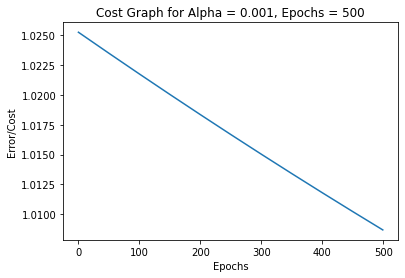
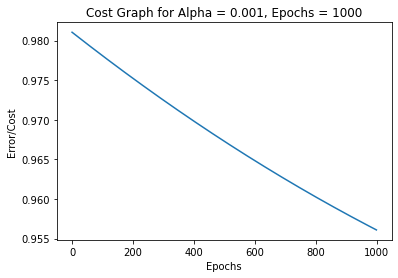
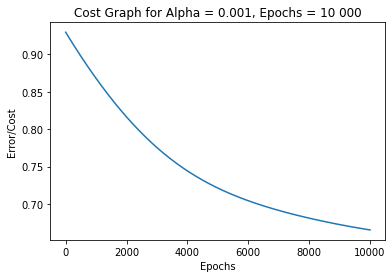
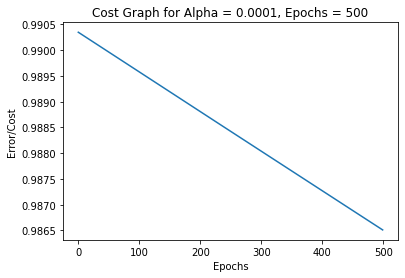
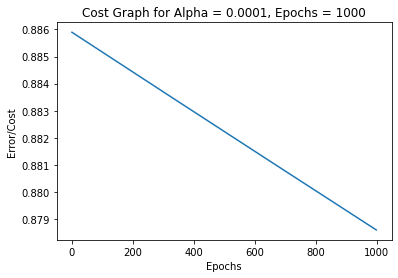
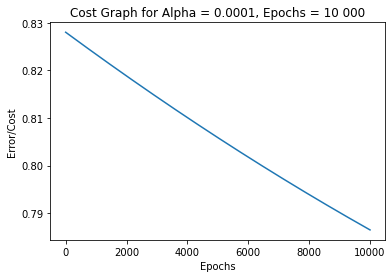
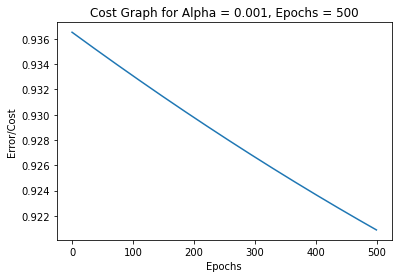
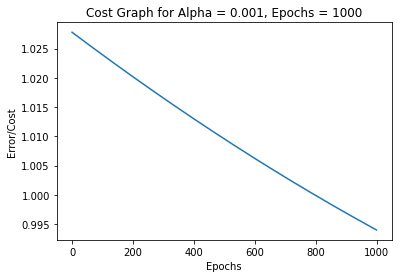
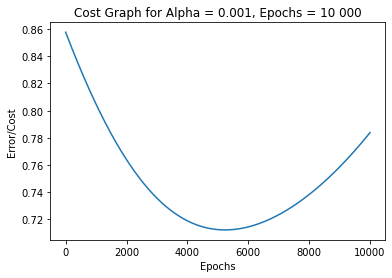
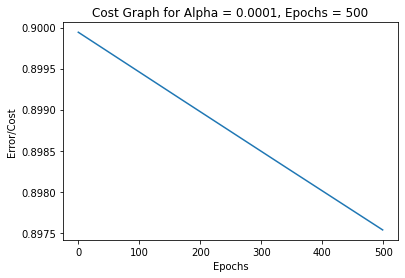
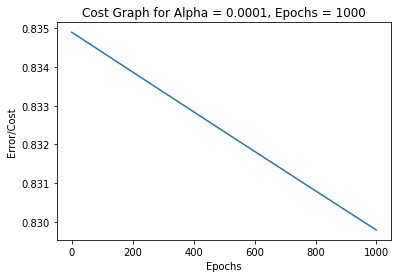
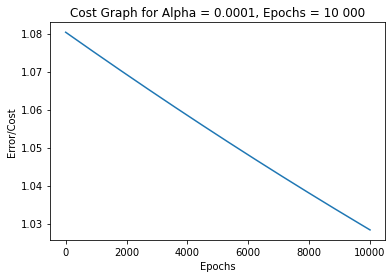
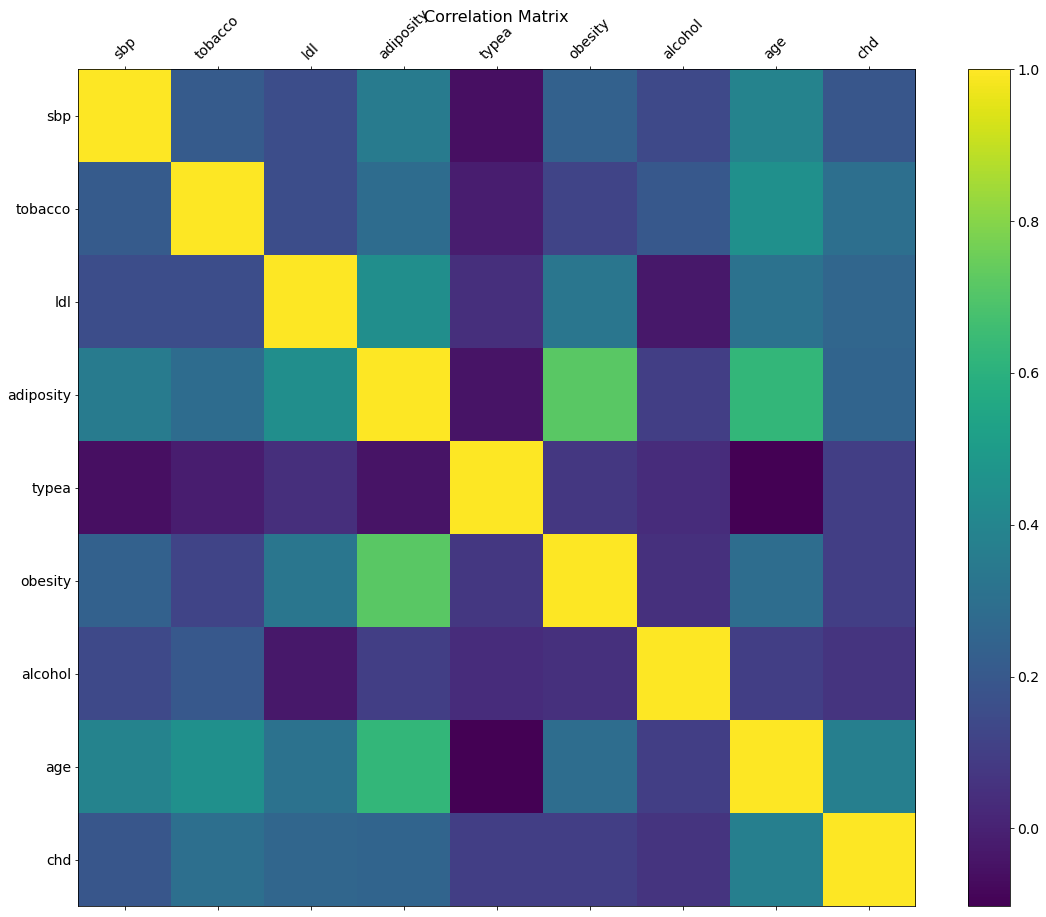